## Column Transformer
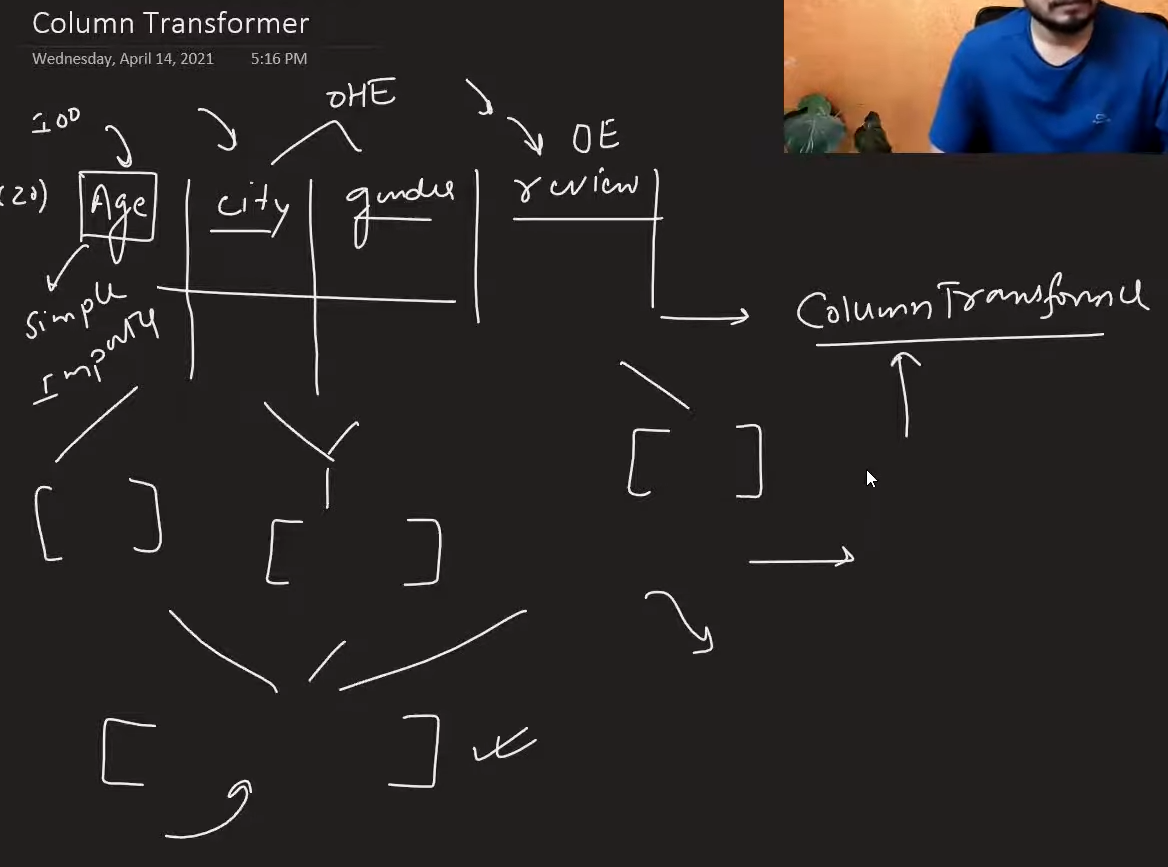

# Example

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
51,11,Female,100.0,Strong,Kolkata,Yes
76,80,Male,100.0,Mild,Bangalore,Yes
12,25,Female,99.0,Strong,Kolkata,No
56,71,Male,NaN,Strong,Kolkata,No
26,19,Female,100.0,Mild,Kolkata,Yes


In [5]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [7]:
X_train

,age,gender,fever,cough,city
17,40,Female,98.0,Strong,Delhi
69,73,Female,103.0,Mild,Delhi
45,72,Male,99.0,Mild,Bangalore
24,13,Female,100.0,Strong,Kolkata
52,47,Female,100.0,Strong,Bangalore
...,...,...,...,...,...
51,11,Female,100.0,Strong,Kolkata
1,27,Male,100.0,Mild,Delhi
25,23,Male,NaN,Mild,Mumbai
20,12,Male,98.0,Strong,Bangalore


## 1. Menual Transformer

In [8]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [9]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [10]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

C:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 4)

In [11]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [12]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Column Transformer library

In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [15]:
transformer.fit_transform(X_train).shape

C:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 7)

In [16]:
transformer.transform(X_test).shape

(20, 7)